# HAR Task 1

Importing all required libraries needed for this task

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Question 1

Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In this question, the csv files in the Combined/Train were read and stored in Numpy Array. We extracted data from a different time and offset so that we can remove the initial and ending noise in the data sample.


X_train shape: (6, 1000, 3)
y_train shape: (6,)
(array([3]),)
(array([5]),)
(array([4]),)
(array([1]),)
(array([2]),)
(array([0]),)


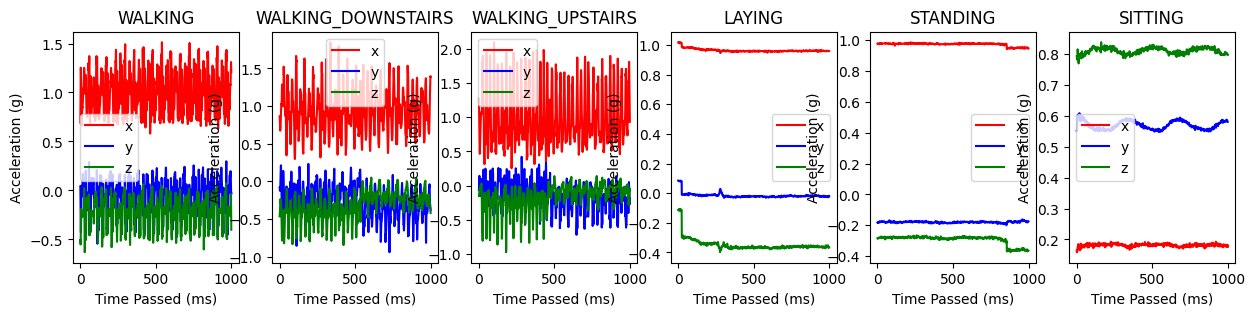

In [67]:

folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = "Combined"
dataset_dir = os.path.join(combined_dir, "Train")   # This is in the same folder as your notebook
X_train = []  # Sensor data
y_train = []  # Activity labels
time = 20
ignore_rows = 1000

# Get activity data
for folder in folders:
    folder_path = os.path.join(dataset_dir, folder)
    files = os.listdir(folder_path)
    
    # Pick the 6th file (index 5) for each activity
    file = files[5]
    df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
    df = df[ignore_rows:ignore_rows + time * 50]

    X_train.append(df.values)
    y_train.append(classes[folder])
X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape) # 3D array
print("y_train shape:", y_train.shape) # 1D array



# Define a list of activities
activities = ["WALKING",  "WALKING_DOWNSTAIRS","WALKING_UPSTAIRS","LAYING", "STANDING","SITTING", ]

# Create a figure and axes for subplots with 6 columns and 1 row
fig, axes = plt.subplots(figsize=(15, 3), nrows=1, ncols=6)

# Iterate through each activity
for i, activity in enumerate(activities):
    # Find the index of the first sample data (y_train) that corresponds to a specific activity class.
    # Since y_train is a 1D array, we can use np.where to find the index of the first occurrence of the activity class.
    act_ind = np.where(y_train == (i + 1))[0][0]
    print(np.where(y_train == (i + 1)))
    sample_data = X_train[act_ind]

    # Plot the accelerometer data for each axis
    axes[i].plot(sample_data[:, 0], label='x', color='red')
    axes[i].plot(sample_data[:, 1], label='y', color='blue')
    axes[i].plot(sample_data[:, 2], label='z', color='green')

    # Set the title and labels
    axes[i].set_title(activity)
    axes[i].set_xlabel('Time Passed (ms)')
    axes[i].set_ylabel('Acceleration (g)')
    axes[i].legend()

# Adjust layout and display the plot

plt.show()

Observations

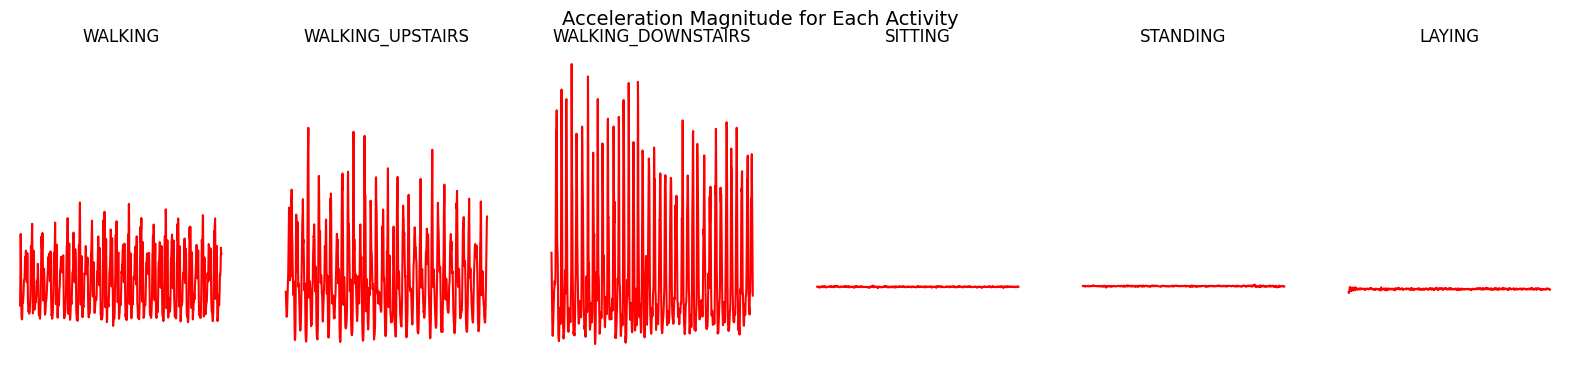

In [68]:
classes = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
           4:"SITTING", 5:"STANDING", 6:"LAYING"} # this makes a dictionary of the array 
fig1, axes = plt.subplots(1, 6, figsize=(20, 4), sharex=True, sharey=True)
for i,j in enumerate(classes.keys()): 
    sample = X_train[y_train == j][0]

    acc_Total = np.sum(sample**2,axis=1)# a_total= ax^2 
    axes[i].plot(acc_Total,color='red')
    axes[i].set_title(classes[j])
    axes[i].axis('off')

fig1.suptitle("Acceleration Magnitude for Each Activity", fontsize=14)
plt.show()


# Question 2

Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration 
(
a
c
c
x
2
+
a
c
c
y
2
+
a
c
c
z
2
)
 for each activity and justify your answer.

Here we first collected the data from the Combined folder having csv files for train and test data and then stored in Numpy Arrays. This would help in the further questions.

In [80]:

time = 10
offset = 0
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")


# Got the train dataset 
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Got the test dataset
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# entire dataset x and y

X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))


seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)

print("Testing data shape: ",X_test.shape)


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Here, we calculated the linear acceleration (
a
c
c
x
2
+
a
c
c
y
2
+
a
c
c
z
2
)
for each activity and calculated the dynamic activity average, static activity average and the threshold.

In [70]:
sampling_rate = 50
time = 10
#making a nested list to sort the data according to the activies
activities= [[] for i in range(6)]    

for sample in range(len(X_train)):
    index = y_train[sample]-1
    for lines in range(sampling_rate*time):
        acc = X_train[sample][lines]
        activities[index].append(acc[0]**2+acc[1]**2+acc[2]**2) #appending the total acceleration in activities list


print("dynamic")
print(f"Walking:            {np.average(activities[0])}")
print(f"Walking_upstairs:   {np.average(activities[1])}")
print(f"Walking_downstairs: {np.average(activities[2])}")
print(f"static:")
print(f"Sitting:  {np.average(activities[3])}") #the indexing is done in the same was as in the classes dicionary in the codeblock above
print(f"Standing: {np.average(activities[4])}")
print(f"Laying:   {np.average(activities[5])}")
print()




dynamic_average = np.average(np.array([np.average(activities[i]) for i in [0,1,2]]))
static_average = np.average(np.array([np.average(activities[i]) for i in [3,4,5]]))
print(f"\n threshold: {np.average(np.array([float(dynamic_average), float(static_average)]))}")


dynamic
Walking:            1.152366281322744
Walking_upstairs:   1.16128542585783
Walking_downstairs: 1.2207898147671647
static:
Sitting:  1.0314704929206324
Standing: 1.0643505056590854
Laying:   1.0137785628207248


 threshold: 1.10734018055803


# Question 3

Currently X_train,y_train has unsorted class samples thus we need to get the samples of each class/activity together.

In [71]:
#Sorting according to the classes
samples_data_classwise= [[] for i in range(6)]
samples_data_classwise_total = [[] for i in range(6)]
#Sorting all the files accordind to the classes, appending individual acceleration as well as total acceleration separately
for samples in range(len(X_train)):
    index_ = y_train[samples]-1 # The y_train is 1-based index thus we want to get into 0-based index
    samples_data_classwise[index_].append(X_train[samples])
    temp_acceleration_total = []
    for i in range(len(X_train[samples])):
        acc_total = X_train[samples][i][0]**2+ X_train[samples][i][1]**2  + X_train[samples][i][2]**2
        temp_acceleration_total.append(acc_total)
    samples_data_classwise_total[index_].append(temp_acceleration_total)

In [72]:
y_train_sorted = sorted(y_train)
samples_data_classwise = np.array(samples_data_classwise)
print(f"Initially, {samples_data_classwise.shape}")
samples_data_classwise = np.vstack(samples_data_classwise) # Helps to get all samples together in the same order classwise
print(f"After v_stack, {samples_data_classwise.shape}")
samples_data_classwise = samples_data_classwise.reshape(-1,1500)
print(f"After flattening it, {samples_data_classwise.shape}")

Initially, (6, 21, 500, 3)
After v_stack, (126, 500, 3)
After flattening it, (126, 1500)


In [73]:
samples_data_classwise_total = np.array(samples_data_classwise_total)
print(f"Initially, {samples_data_classwise_total.shape}")
samples_data_classwise_total = np.vstack(samples_data_classwise_total) # Helps to get all samples together in the same order classwise
print(f"After v_stack, {samples_data_classwise_total.shape}")


Initially, (6, 21, 500)
After v_stack, (126, 500)


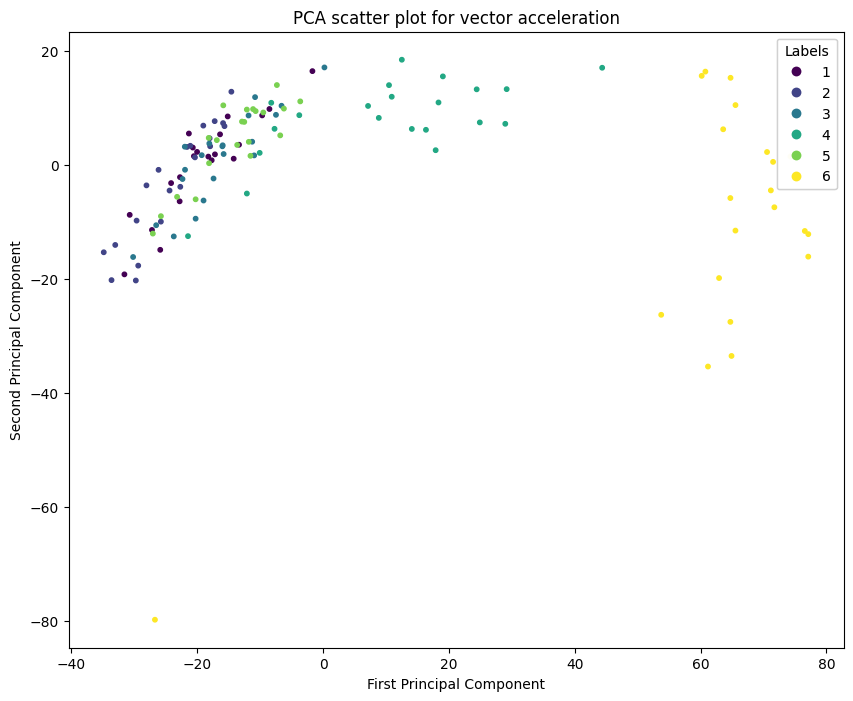

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_normalized = scaler.fit_transform(samples_data_classwise)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_sorted, cmap='viridis', s=10)
plt.gca().add_artist(plt.legend(*scatter.legend_elements(), loc="upper right", title="Labels"))
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title("PCA scatter plot for vector acceleration")
plt.show()

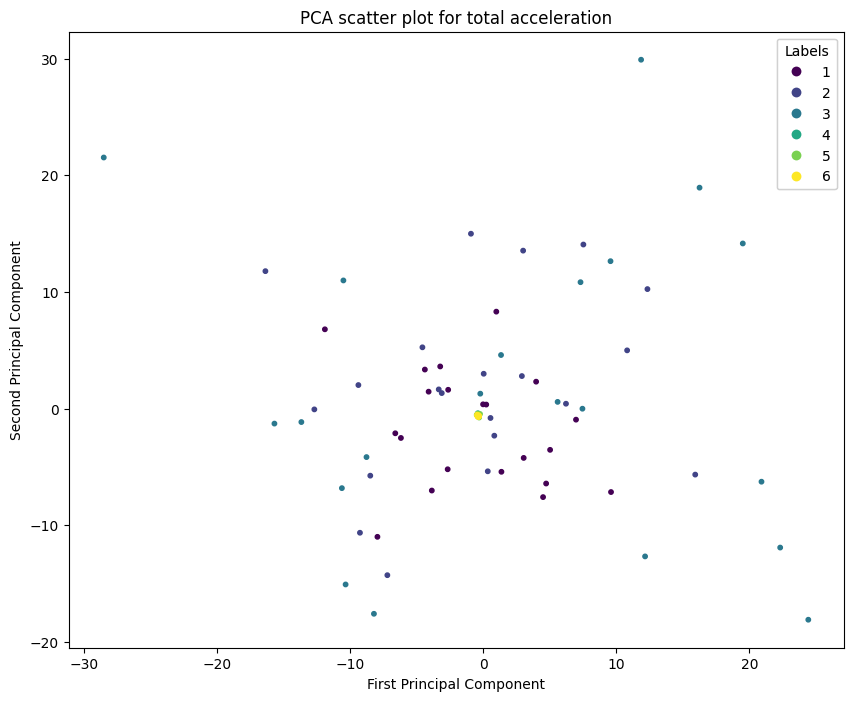

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_normalized = scaler.fit_transform(samples_data_classwise_total)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train_sorted, cmap='viridis', s=10)
plt.gca().add_artist(plt.legend(*scatter.legend_elements(), loc="upper right", title="Labels"))
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title("PCA scatter plot for total acceleration")
plt.show()

In [76]:
import tsfel

#creating a nested list result, which stores the data generated by tsfel sorted according to the classes
result_tsfel = []
for a in range(6):
    result_tsfel.append([])

#Sorting according to the classes
samples_data_classwise= [[] for i in range(6)]
samples_data_classwise_total = [[] for i in range(6)]
#Sorting all the files accordind to the classes, appending individual acceleration as well as total acceleration separately
for samples in range(len(X_train)):
    index_ = y_train[samples]-1 # The y_train is 1-based index thus we want to get into 0-based index
    samples_data_classwise[index_].append(X_train[samples])
    temp_acceleration_total = []
    for i in range(len(X_train[samples])):
        acc_total = X_train[samples][i][0]**2+ X_train[samples][i][1]**2  + X_train[samples][i][2]**2
        temp_acceleration_total.append(acc_total)
    samples_data_classwise_total[index_].append(temp_acceleration_total)
    
for a in range(len(samples_data_classwise_total)):
    for b in range(len(samples_data_classwise_total[a])):
        X_train_sig = pd.DataFrame(samples_data_classwise_total[a][b]) # accessing each of the file stored in the main list
        
        cfg_file = tsfel.get_features_by_domain()                                                        
        X_train = tsfel.time_series_features_extractor(cfg_file, X_train_sig, fs=50) #extracting data according to the fs = 50, which is the sampling frequency
        result_tsfel[a].append(X_train.to_numpy()[0]) # appending the list in the result.

column_names = X_train

In [78]:
result_tsfel = np.array(result_tsfel)
print(result_tsfel.shape)
result_tsfel = np.vstack(result_tsfel)
result_tsfel.shape

(126, 156)


(126, 156)

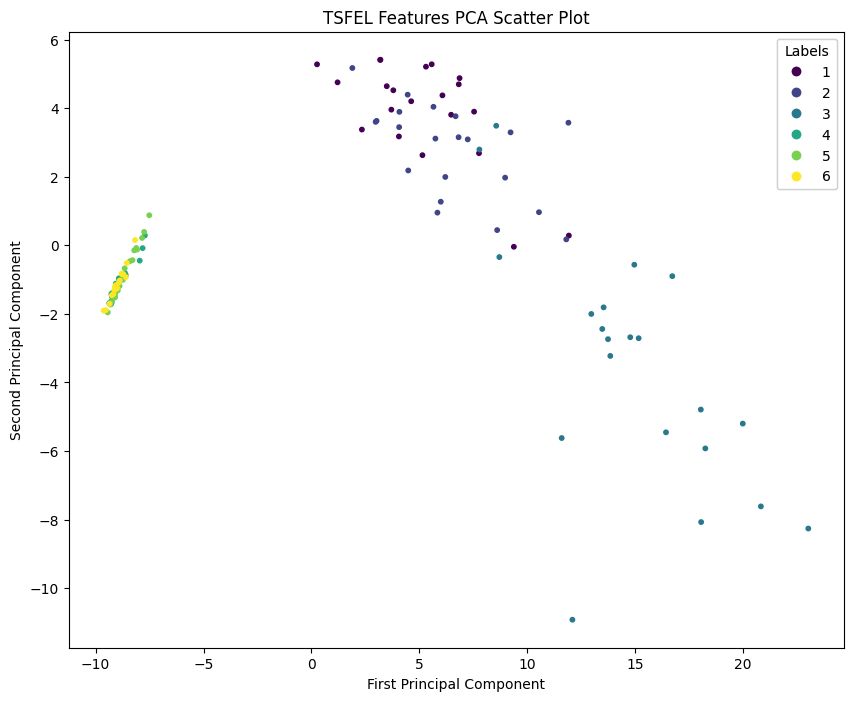

In [79]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(result_tsfel)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_sorted, cmap='viridis', s=10)
plt.gca().add_artist(plt.legend(*scatter.legend_elements(), loc="upper right", title="Labels"))
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title('TSFEL Features PCA Scatter Plot')
plt.show()